In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X=data['data']
y=data['target']
cols=data['feature_names']
df=pd.DataFrame(X,columns=cols)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
X=np.array(df)

k = 3
km=KMeans(n_clusters=k)
km.fit(X[:,0:4]) # Todas as linhas e até a coluna 4
df['c']=km.labels_
df['tgt']=y




In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),c,tgt
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [47]:
cc = km.cluster_centers_
cc

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [48]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [49]:
# Calculando o custo
custo = 0

for i in range(len(df)):
    p=np.array([df.iloc[i,0], df.iloc[i,1], df.iloc[i,2], df.iloc[i,3]])
    c = km.labels_[i]
    custo+=np.linalg.norm(p - cc[c])**2
custo

78.85144142614601

In [5]:
# Função para calcular e retornar o custo
# custo = Σ(d,c)^2 -> Somatório de da distância do ponto di para a centróide ci

def reg(k):
    X=np.array(df)
#     k = 3
    km=KMeans(n_clusters=k)
    km.fit(X[:,0:4]) # Todas as linhas e até a coluna 4
    df['c']=km.labels_
    df['tgt']=y
    cc = km.cluster_centers_
    custo = 0

    for i in range(len(df)):
        p=np.array([df.iloc[i,0], df.iloc[i,1], df.iloc[i,2], df.iloc[i,3]])
        c = km.labels_[i]
        custo+=np.linalg.norm(p - cc[c])**2
        
    return custo, km.inertia_ # Note que tanto a variável 'custo', quanto km.inertia
                              # retornam a mesma coisa: o custo

In [14]:
reg(2)

(152.347951760358, 152.34795176035792)

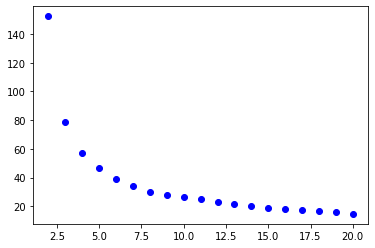

In [10]:
for i in range(2,21):
    km=KMeans(n_clusters=i)
    km.fit(X)
    plt.plot(i, km.inertia_, 'bo')
plt.show()

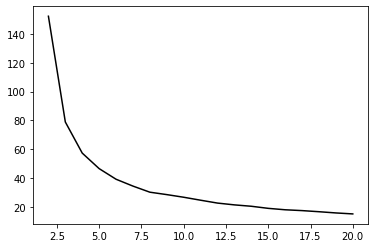

In [11]:
lk = [k for k in range(2,21)]
li = []

for i in range(2,21):
    km=KMeans(n_clusters=i)
    km.fit(X)
    li.append(km.inertia_)
plt.plot(lk, li, color='black')
plt.show()